<h2>Import Library</h2>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Preparation
</h2>

In [25]:


# Load the dataset
df = pd.read_csv('apps.csv')

# View basic info
print(df.info())
print(df.head())

# Drop duplicates
df.drop_duplicates(inplace=True)

# Remove rows with missing values in important columns
df.dropna(subset=['Rating', 'Category', 'Installs', 'Price'], inplace=True)

# Clean 'Installs' column
df['Installs'] = df['Installs'].str.replace(r'[+,]', '', regex=True).astype(int)

# Clean 'Price' column
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)

# Convert 'Reviews' and 'Size' to numeric
df['Reviews'] = df['Reviews'].astype(int)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None
   Unnamed: 0                                                App  \
0           0     Photo Editor & Cand

<h2>Category Exploration</h2>

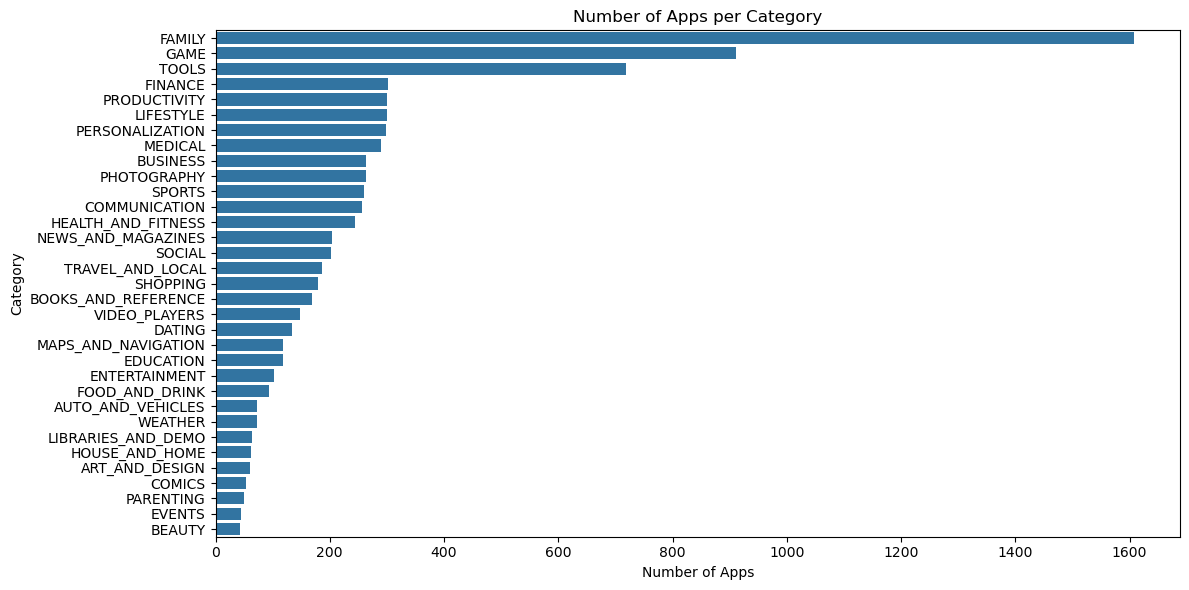

In [23]:


# App count per category
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index)
plt.title('Number of Apps per Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


<h2>Metrics Analysis</h2>
<h3>App Ratings Distribution</h3>

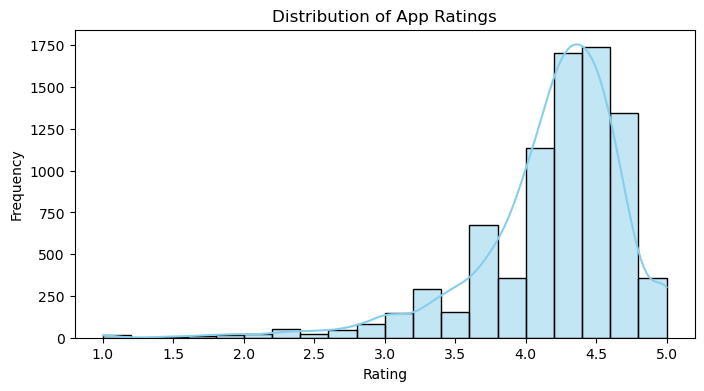

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<h2>Installs vs. Price (Free vs Paid)</h2>

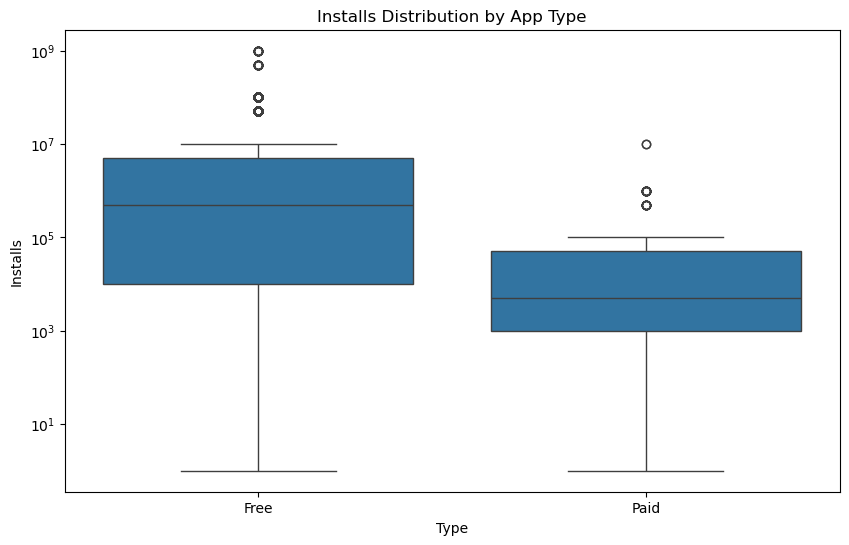

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type', y='Installs', data=df)
plt.yscale('log')
plt.title('Installs Distribution by App Type')
plt.show()


<h2>Sentiment Analysis (with User Reviews Dataset)</h2>

C:\Users\hp\AppData\Local\Temp\ipykernel_13664\1550311300.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




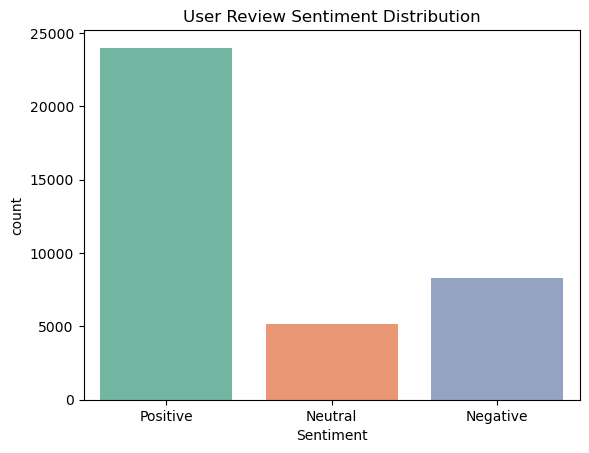

In [28]:
reviews = pd.read_csv('user_reviews.csv')

# Drop missing sentiment labels
reviews.dropna(subset=['Sentiment'], inplace=True)

# Sentiment Count
sns.countplot(data=reviews, x='Sentiment', palette='Set2')
plt.title("User Review Sentiment Distribution")
plt.show()

# Merge reviews with main dataset
merged = pd.merge(df, reviews, on='App')


<h2>Interactive Visualization</h2>
<h4>Use Plotly for interactivity:</h4>

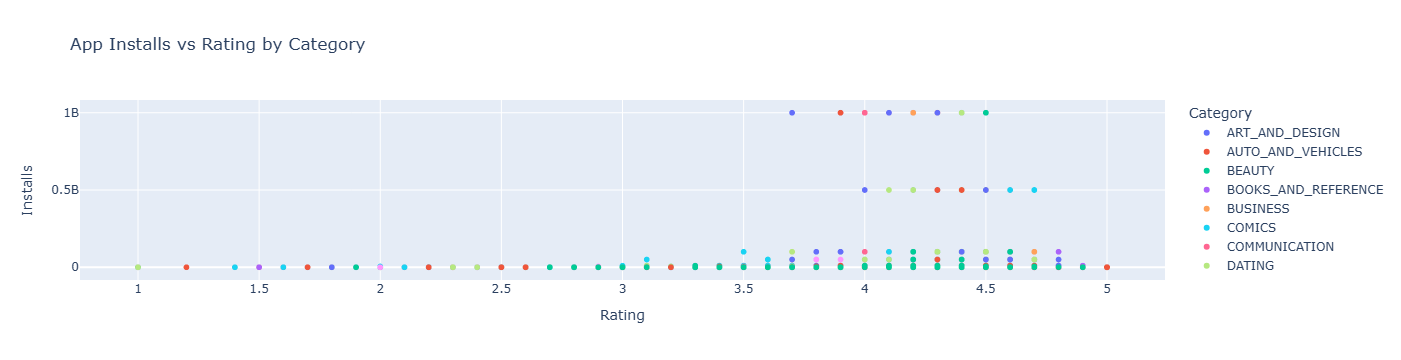

In [29]:
import plotly.express as px

# Interactive chart: Installs vs Rating
fig = px.scatter(df, x='Rating', y='Installs', color='Category', hover_data=['App', 'Price'], title="App Installs vs Rating by Category")
fig.show()


| Step                | Key Outcome                               |
| ------------------- | ----------------------------------------- |
| ✅ Data Prep         | Cleaned dataset with correct types        |
| ✅ Category Analysis | Top categories by count                   |
| ✅ Metrics           | Patterns in size, price, rating, installs |
| ✅ Sentiment         | User attitudes toward apps                |
| ✅ Visualization     | Clear, interactive insights               |


<h2>Skill Enhancement: Good Visualization Practices</h2>
From "Understanding Data Visualization" :

Label axes and titles clearly.

Avoid chart junk (no unnecessary 3D, grid clutter).

Use color wisely to show comparison, not just decoration.

Ensure accessibility (color contrast, font size).

Use interactivity where exploration adds value (Plotly).